First 5 rows of the dataset:
   Cargo_Capacity_kg  Air_Temperature_Celsius Weather_Status Package_Type  \
0           4.270384                32.241410         Cloudy        Maize   
1           5.120852                24.635445          Sunny       Cotton   
2           2.976017                16.292566         Cloudy       Barley   
3           4.990381                      NaN          Sunny      Soybean   
4           2.938318                21.689674            NaN      Soybean   

  Vertical_Landing  Equipment_Cost  Market_Region Flight_Duration_Minutes  \
0        Supported        36563.84          Local                   False   
1        Supported        29156.29          Local                   False   
2          Unknown        10909.55  International                   False   
3              NaN        48315.38  International                    True   
4          Unknown        49506.24          Local                   False   

  Terrain_Type  Water_Usage_liters  Flight_Ho

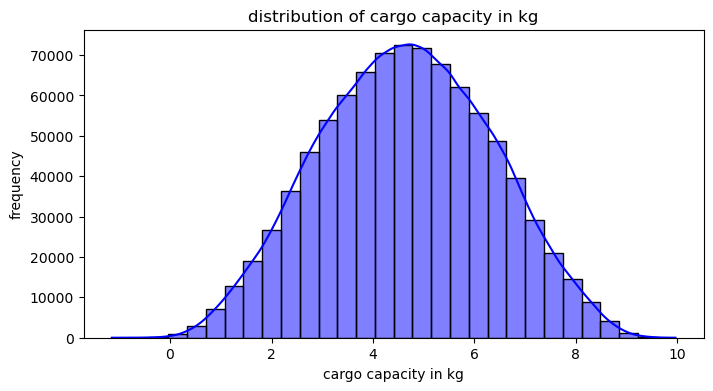

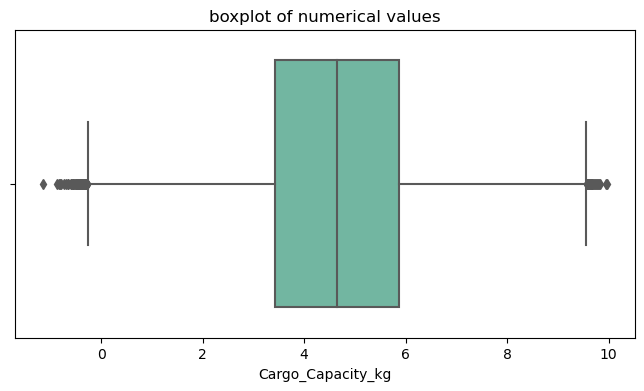

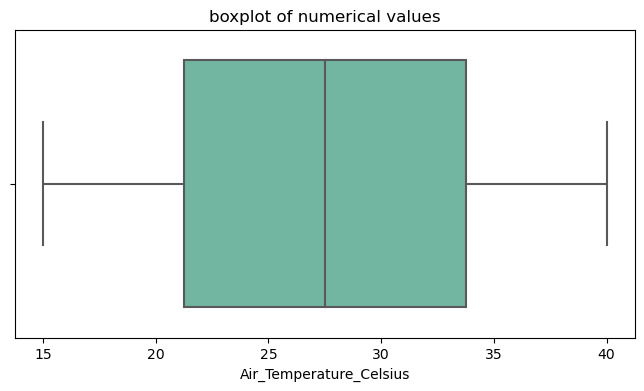

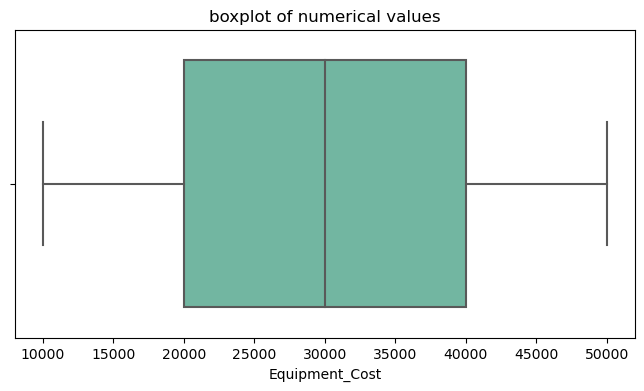

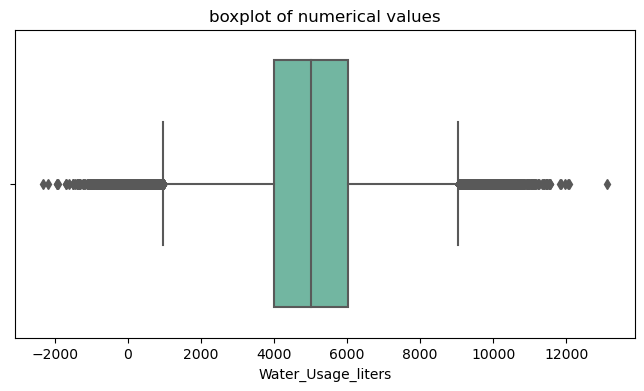

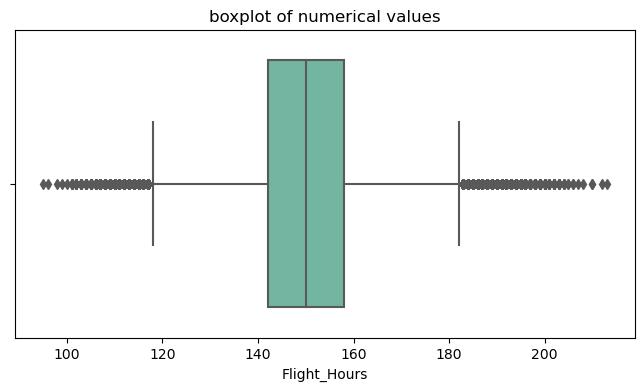

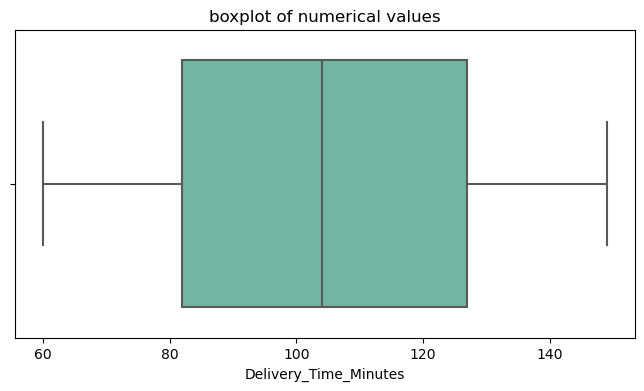

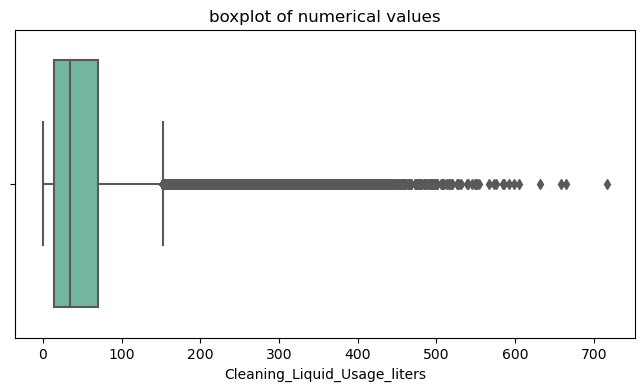

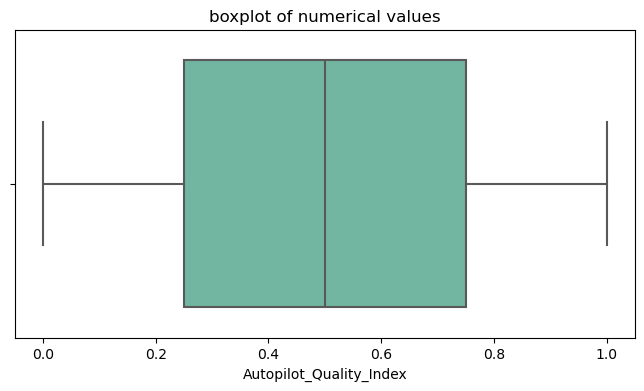

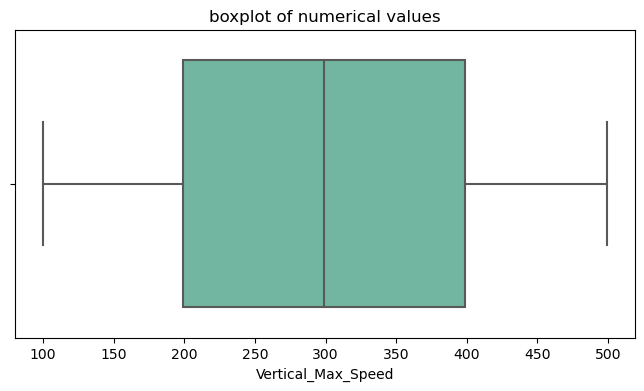

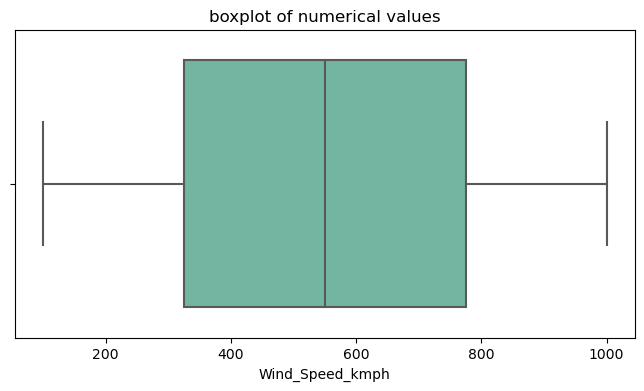

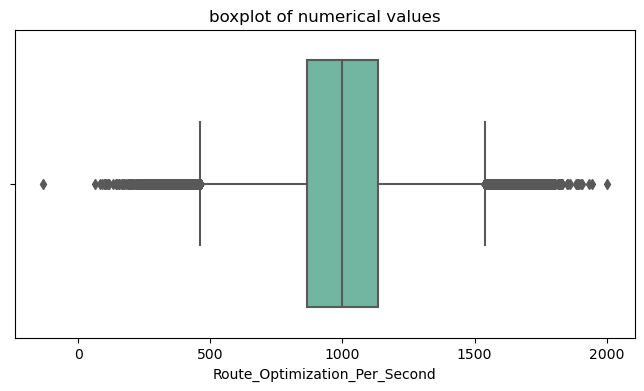

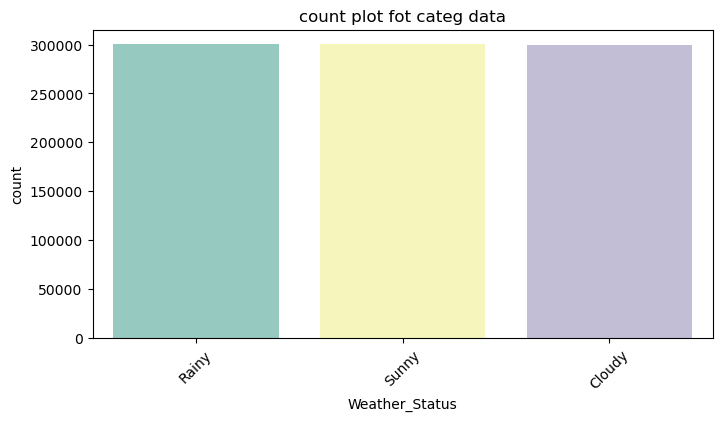

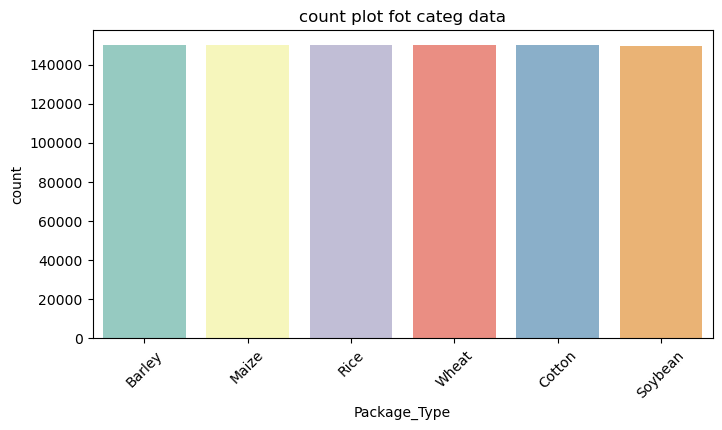

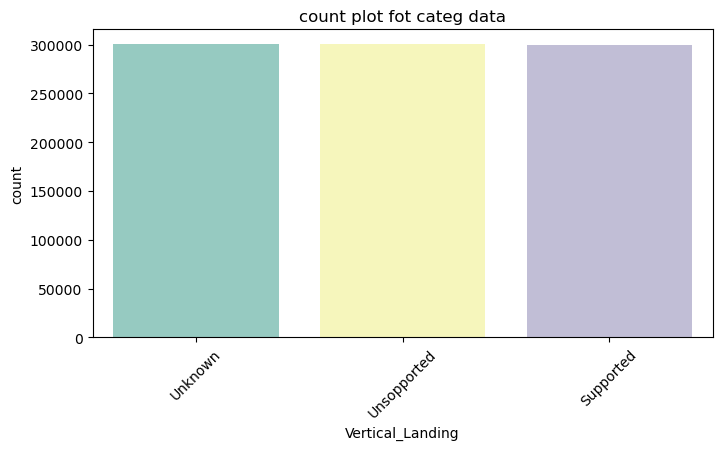

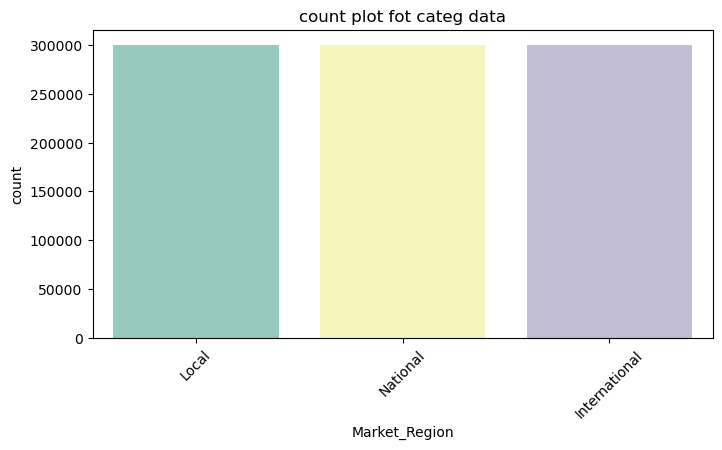

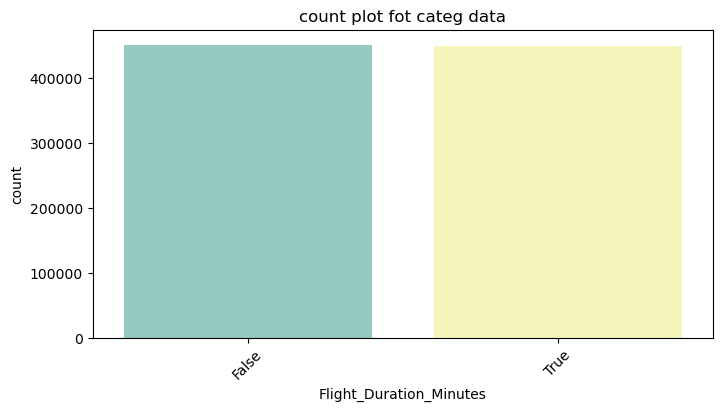

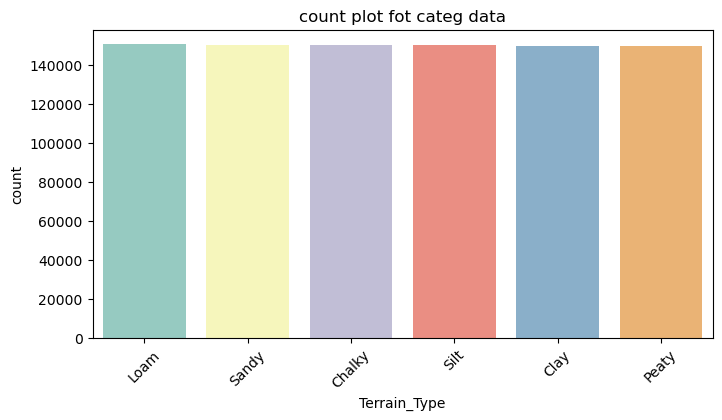

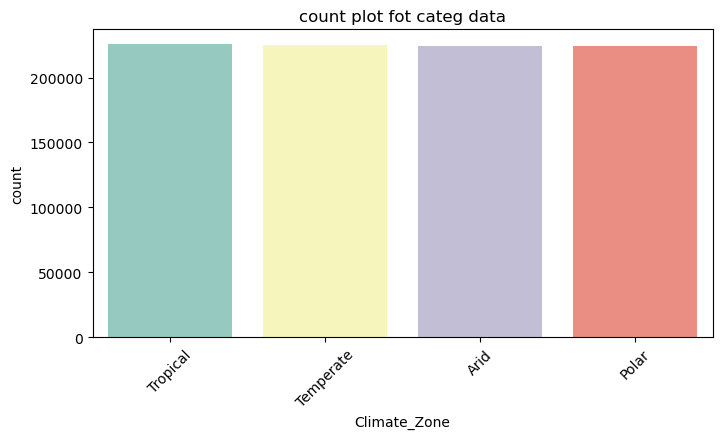

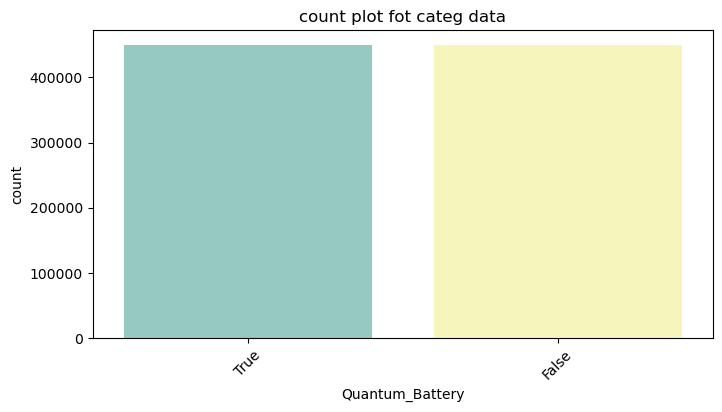

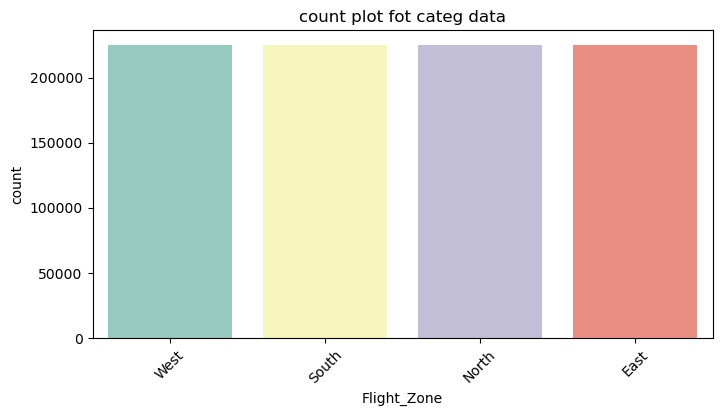

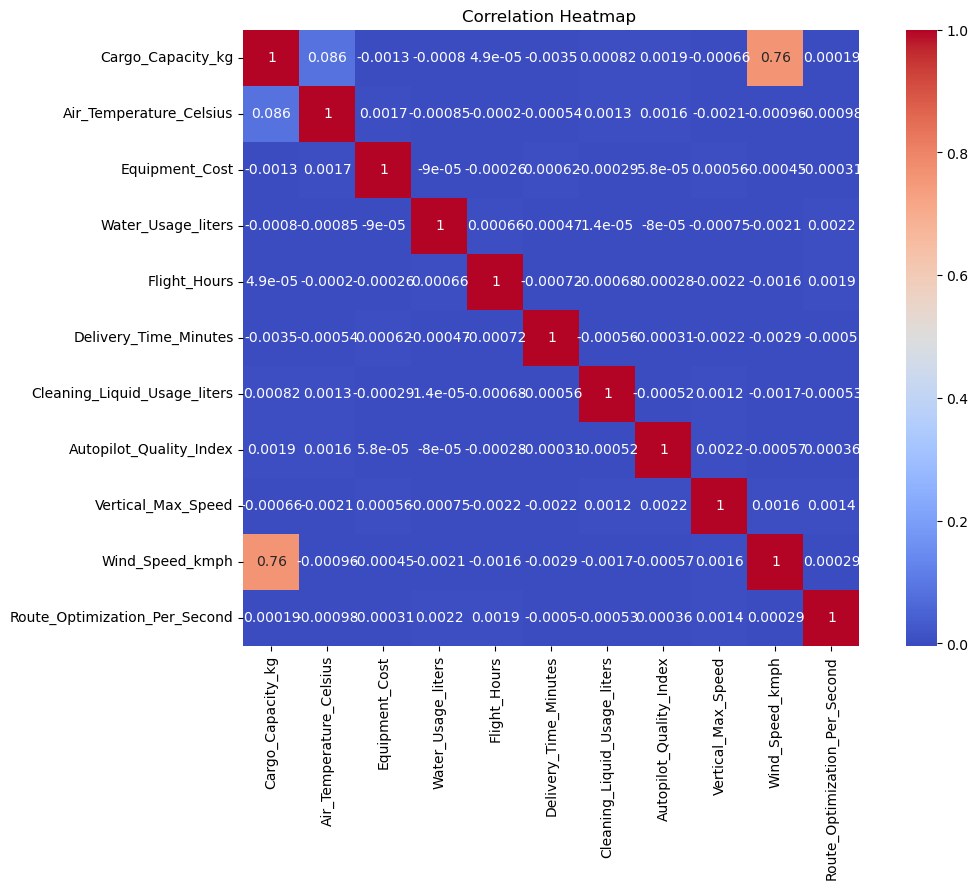

In [2]:
#eda code (with visualizations, without missing data handling)
import pandas as pd #data handling
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
data = pd.read_csv('/Users/sabinanurseitova/Desktop/AI project/aeropolis.csv') #path

#here, we just wanna display info on the csv dataset
print("First 5 rows of the dataset:")#we can remove it later 
print(data.head())

print("Dataset info:")
print(data.info())#column names, data types, non null counts

print("Summary statistics:")
print(data.describe())# summary of numerical columns

print("Missing values:")
print(data.isnull().sum())#counts missing values in each column

#im not sure should we focus on target variable more or just do it in general, like this is this bla bla bla
#so, i just decided to focus on it, and we will change it after asking the prof about it 

#visualization 
#cargo capacity analysis
plt.figure(figsize=(8,4))
sns.histplot(data['Cargo_Capacity_kg'],kde=True, bins=30, color='blue')#histogram with density curve
plt.title("distribution of cargo capacity in kg")
plt.xlabel("cargo capacity in kg")
plt.ylabel("frequency")
plt.show()

#numerical feautures analysis - identify anomalies
numerical_cols=data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col],palette="Set2")
    plt.title("boxplot of numerical values")
    plt.show()

#categorical values analysis - bar plot to analyze distributions of cat vars
categorical_cols=data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=data[col], order=data[col].value_counts().index, palette="Set3")
    plt.title("count plot fot categ data")
    plt.xticks(rotation=45) #we can change it or delete, just makes it easier to read
    plt.show()

#correlation heatmap, shows which aspect correlates with cargo cap more
plt.figure(figsize=(12,8))
corr=data.corr(numeric_only=True)
sns.heatmap(corr, annot=True,cmap='coolwarm', square=True)#2f is 2 decimal places
plt.title("Correlation Heatmap ")
plt.show()







In [ ]:
#data preparation and preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split #randomized splitting
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

data = pd.read_csv('/Users/sabinanurseitova/Desktop/AI project/aeropolis.csv')
data['Cargo_Capacity_kg'] = data['Cargo_Capacity_kg'].fillna(data['Cargo_Capacity_kg'].mean())#target val mis values
X = data.drop(columns=['Cargo_Capacity_kg'])#we're just removing our target value from there
y = data['Cargo_Capacity_kg'] #identifying target value here

#
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

#preprocessing 
#separating numerical and categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

#then, we are telling each column how to deal with problems, like missing values
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),#fill out with mean
    ('scaler', StandardScaler())#just for scaling
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),#will out with mode value
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))#categorical into binary numbers, so machine could read it
])

preprocessor=ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
#model selection 
#model initialization
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}
#model iteration and performance analysis
for name, model in models.items():
    try:
        print(f"Processing model: {name}")
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        model_pipeline.fit(X_train, y_train)
        val_score = model_pipeline.score(X_val, y_val)
        print (f"{name} Validation Score: {val_score:.2f}")
    except Exception as e:
        print(f"Error with {name}: {e}")
